In [1]:
import rasterio
import rasterio.mask
import geopandas as gpd
from shapely.geometry import mapping

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
def normilize(x, x_min, x_max, a=0, b=255):
    x[x< x_min] = x_min
    x[x>x_max] = x_max
    x_norm = (b - a) * ((x - x_min)/(x_max - x_min)) + a
    return x_norm

In [15]:
norm_dict ={
    "B01": {'min': 1000,
          "max":1700},
    "B02": {'min': 1000,
          "max":2000},
    "B03": {'min': 1000,
      "max":2000},
    "B04": {'min': 1000,
      "max":3000},
    "B05": {'min': 1000,
      "max":3000},
    "B06": {'min': 1000,
      "max":4000},
    "B07": {'min': 2000,
      "max":4000},
    "B08": {'min': 1800,
      "max":3600},
    "B08A": {'min': 2000,
      "max":4000},
    "B09": {'min': 380,
      "max":800},
    "B10": {'min': 10,
      "max":20},
    "B11": {'min': 10,
      "max":20},
    "B11": {'min': 2000,
      "max":5000},
    "B12": {'min': 1000,
      "max":4000},
}

In [2]:
train_df = gpd.read_file("/home/user/projects/africa_starving/data/train/train/train_repr.geojson")

In [6]:
raster_path = "/home/user/projects/africa_starving/data/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/GRANULE/L1C_T34JEP_A007983_20170101T084543/IMG_DATA/T34JEP_20170101T082332_B08.jp2"

In [49]:
save_path = raster_path.split("/")[:7] + 'train_only_crop'

['',
 'home',
 'user',
 'projects',
 'africa_starving',
 'data',
 'S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE']

In [33]:
src = rasterio.open(raster_path, 'r')
for num, row in train_df.iterrows():
    try:
        masked_image, out_transform = rasterio.mask.mask(src, [mapping(row['geometry'])], crop=True, nodata=0)
        #masked_image = normalize(masked_image, x_min=norm_dict.get("B08").get('min'), x_max=norm_dict.get("B08").get('max'))
    except:
        continue
#     masked_meta = src.meta.copy()
#     masked_meta.update({"driver": "GTiff",
#                         "height": masked_image.shape[1],
#                         "width": masked_image.shape[2],
#                         "transform": out_transform})
    break

In [41]:
x_nirm = normilize(masked_image, x_min=norm_dict.get("B08").get('min'), x_max=norm_dict.get("B08").get('max'))

In [42]:
x_nirm.max()

240.83333333333331

In [35]:
norm_dict.get("B08").get('min')

1800

In [36]:
norm_dict.get("B08").get('max')

3600

In [8]:
train_df.crs

{'init': 'epsg:32734'}

In [9]:
src.crs

CRS({'init': 'epsg:32734'})

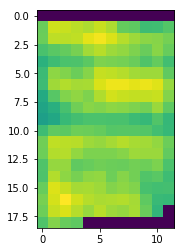

In [43]:
plt.imshow(x_nirm[0])

In [20]:
masked_image.max()

2835

In [21]:
masked_image.max()

2835